In [ ]:
import numpy as np
class KMeans:
  def __init__(self, n_clusters, iterations=100):
    self.n_clusters=n_clusters
    self.iterations=iterations
  def fit(self,x):
    # step choose centoids randomly
    self.centroids=self.Initialize_centroids(x)
    for i in range(self.iterations):
      # assign each data point to closest centroid
      cluster=self.assign_clusters(x)
      #update centroids
      new_centroids=self.update_centroids(x,cluster)
      # check if converge
      if np.allclose(new_centroids, self.centroids):
        break
      self.centroids=new_centroids
  def predict(self, x):
    return self.assign_clusters      


    
  def update_centroids(self, x,cluster):
    new_centroids=np.array([x[cluster==i].mean(axis=0)for i in range(self.n_clusters)])
    return new_centroids    
  def assign_clusters(self, x):
    distances=np.sqrt(((x-self.centroids[:, np.newaxis])**2).sum(axis=2)  ) 
    cluster=np.argmin(distances, axis=0)
    return cluster
  def Initialize_centroids(self, x):
    idx=np.random.choice(x.shape[0], self.n_clusters,replace=False)
    centroids=x[idx]
    return centroids    

In [ ]:

import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


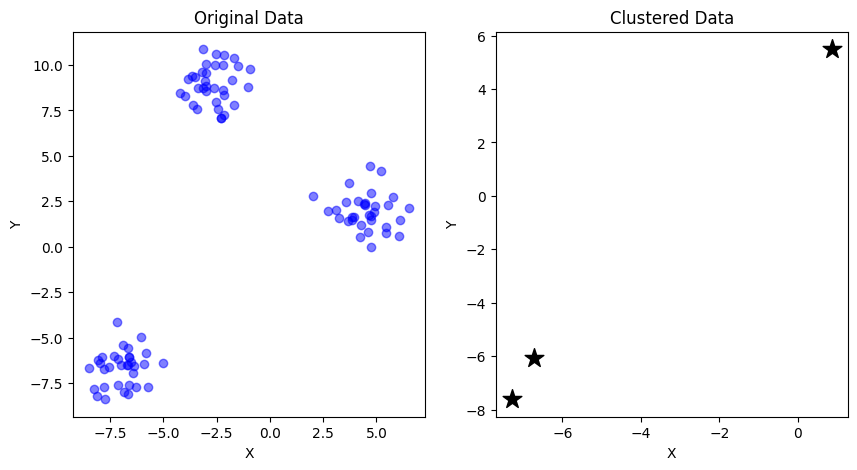

In [ ]:
# Generate random data using make_blobs
X ,_= make_blobs(n_samples=100, centers=3, random_state=42)

# Create KMeansClustering object and fit to data
kmeans = KMeans(n_clusters=3, iterations=100)
kmeans.fit(X)

# Predict cluster labels for new data
new_data = np.array([[0, 0], [10, 10]])
predicted_labels = kmeans.predict(new_data)

# Visualize the data and clusters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data points
axs[0].scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5)
axs[0].set_title('Original Data')

# Plot the data points colored by cluster
cluster_colors = ['red', 'green', 'orange']
for i in range(kmeans.n_clusters):
    axs[1].scatter(X[kmeans.predict(X) == i, 0], X[kmeans.predict(X) == i, 1], color=cluster_colors[i], alpha=0.5)
    axs[1].scatter(kmeans.centroids[i, 0], kmeans.centroids[i, 1], color='black', marker='*', s=200)
axs[1].set_title('Clustered Data')

# Set the axis labels
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.show()


In [1]:
class KMeans:
  def __init__(self, iter=100, k=3):
    self.iter=iter
    self.k=k
  def fit(self, x):
    #choose randommly, centroids
    self.centroids=self.initialize_centroids(x)
    for i in range(self.iter):
      # calculate distance and assign data points to each points
      cluster=self.assign_clusters(x)
      #update centroids
      new_centroids=self.update_centroids(x, cluster)
      if np.allclose(new_centroids, self.centroids):
        break
      self.centroids=new_centroids  
  def predict(self,x):
    return self.assign_clusters(x)    

  
  def update_centroids(self, x, cluster):
    new_centroids=np.array([x[cluster==i].mean(axis=0) for i in range(self.k)])
    return new_centroids  
  def assign_clusters(self, x):
    distances=np.sqrt(((x-self.centroids[:, np.newaxis])**2).sum(axis=2)  )
    cluster=np.argmin(distances, axis=0)
    return cluster
  def initialize_centroids(self, x):
    idx=np.random.choice(x.shape[0], self.k, replace=False)  
    centroids=x[idx]
    return centroids



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


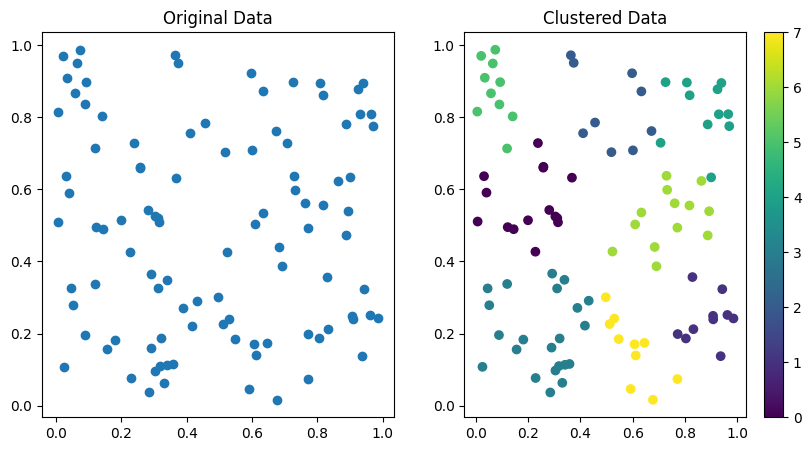

In [2]:



import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 2)

# Create a KMeans object with 3 clusters
kmeans = KMeans()

# Fit the data to the KMeans model
kmeans.fit(X)

# Get the predicted cluster labels for the data points
labels = kmeans.predict(X)

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original data
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_title('Original Data')

# Plot the clustered data
scatter = ax[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
ax[1].set_title('Clustered Data')

# Add a colorbar to the right of the clustered data subplot
fig.colorbar(scatter, ax=ax[1])

plt.show()

     


In [3]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Step 1: Compute the mean of the data
        self.mean = np.mean(X, axis=0)

        # Step 2: Compute the covariance matrix of the data
        X = X - self.mean
        cov_matrix = np.cov(X.T)

        # Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort the eigenvectors based on their corresponding eigenvalues
        eigenvectors = eigenvectors.T
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[sorted_indices]

        # Step 5: Select the first n_components eigenvectors as the principal components
        self.components = sorted_eigenvectors[0:self.n_components]

    def transform(self, X):
        # Step 6: Project the data onto the principal components
        X = X - self.mean
        return np.dot(X, self.components.T)


In [4]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.stddev = None

    def fit(self, X):
        # Step 1: Compute the mean of the data
        self.mean = np.mean(X, axis=0)

        # Step 2: Compute the standard deviation of the data
        self.stddev = np.std(X, axis=0)

        # Step 3: Standardize the data
        X = (X - self.mean) / self.stddev

        # Step 4: Compute the covariance matrix of the data
        cov_matrix = np.cov(X.T)

        # Step 5: Compute the eigenvectors and eigenvalues of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 6: Sort the eigenvectors based on their corresponding eigenvalues
        eigenvectors = eigenvectors.T
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[sorted_indices]

        # Step 7: Select the first n_components eigenvectors as the principal components
        self.components = sorted_eigenvectors[0:self.n_components]

    def transform(self, X):
        # Step 8: Standardize the data
        X = (X - self.mean) / self.stddev

        # Step 9: Project the data onto the principal components
        return np.dot(X, self.components.T)


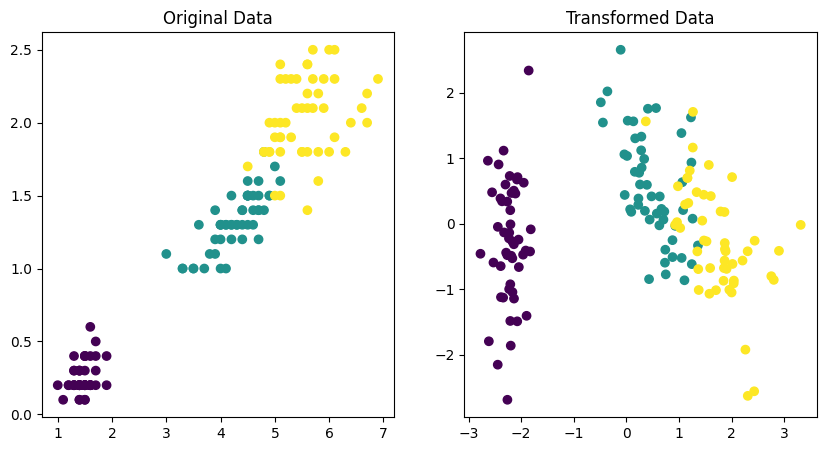

In [22]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Instantiate PCA with 2 components
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

# Plot the transformed data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(X[:, 2], X[:, 3], c=y)
ax1.set_title("Original Data")
ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
ax2.set_title("Transformed Data")
plt.show()
